In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'11000': 1024}


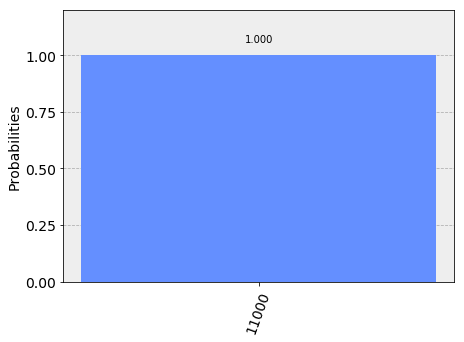

In [15]:
couplingMap = [(1,0),(2,0),(2,1),(3,2),(3,4),(4,2)]

def cRotation(qc, q, i, j, angle):
    half_a = angle / 2
    if i != 2 and j != 2:
        swap(qc, q, 2, j)
        cRotation(qc, q, i, 2, angle)
        swap(qc, q, 2, j)
    else:
        qc.u1(half_a, q[i])
        if(j,i) in couplingMap:
            qc.cx(q[j], q[i])
        else:
            invertCNOT(qc, q, i, j)
        qc.u1(-half_a, q[i])
        if(j,i) in couplingMap:
            qc.cx(q[j], q[i])
        else:
            invertCNOT(qc, q, i, j)
        qc.u1(half_a, q[j])
        
def invertCNOT(qc, q, i, j):
    qc.h(q[i])
    qc.h(q[j])
    qc.cx(q[i], q[j])
    qc.h(q[i])
    qc.h(q[j])
    
def swap(qc, q, i, j):
    if i != 2 and j != 2:
        swap(qc, q, 2, j)
        swap(qc, q, i, 2)
        swap(qc, q, 2, j)
    else:
        if (i,j) in couplingMap:
            qc.cx(q[i], q[j])  
            invertCNOT(qc, q, i, j)
            qc.cx(q[i], q[j])
        else:
            qc.cx(q[j], q[i])  
            invertCNOT(qc, q, j, i)
            qc.cx(q[j], q[i])
            
def inverse_qft(qc, q, indices):
    rev = list(reversed(indices))
    #swaps need to happen
    N = len(rev)
    for i in  range(int(N / 2)):
        j = N - i - 1
        swap(qc, q, i, j)
    for n, i in enumerate(rev):
        angle = -pi/2**n
        for j in rev[:n]:
            cRotation(qc, q, i, j, angle)
            angle *= 2    
        qc.h(q[i])
        
        
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)

# superposition
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

# qubit -> |1>
qc.x(q[4])

cRotation(qc, q, 3, 4, pi/8)
cRotation(qc, q, 2, 4, pi/4)
cRotation(qc, q, 1, 4, pi/2)
cRotation(qc, q, 0, 4, pi)

inverse_qft(qc, q, range(4))

qc.measure(q, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [16]:
theta=2*pi*(1/2+1/4+1/8)
print(theta)

5.497787143782138


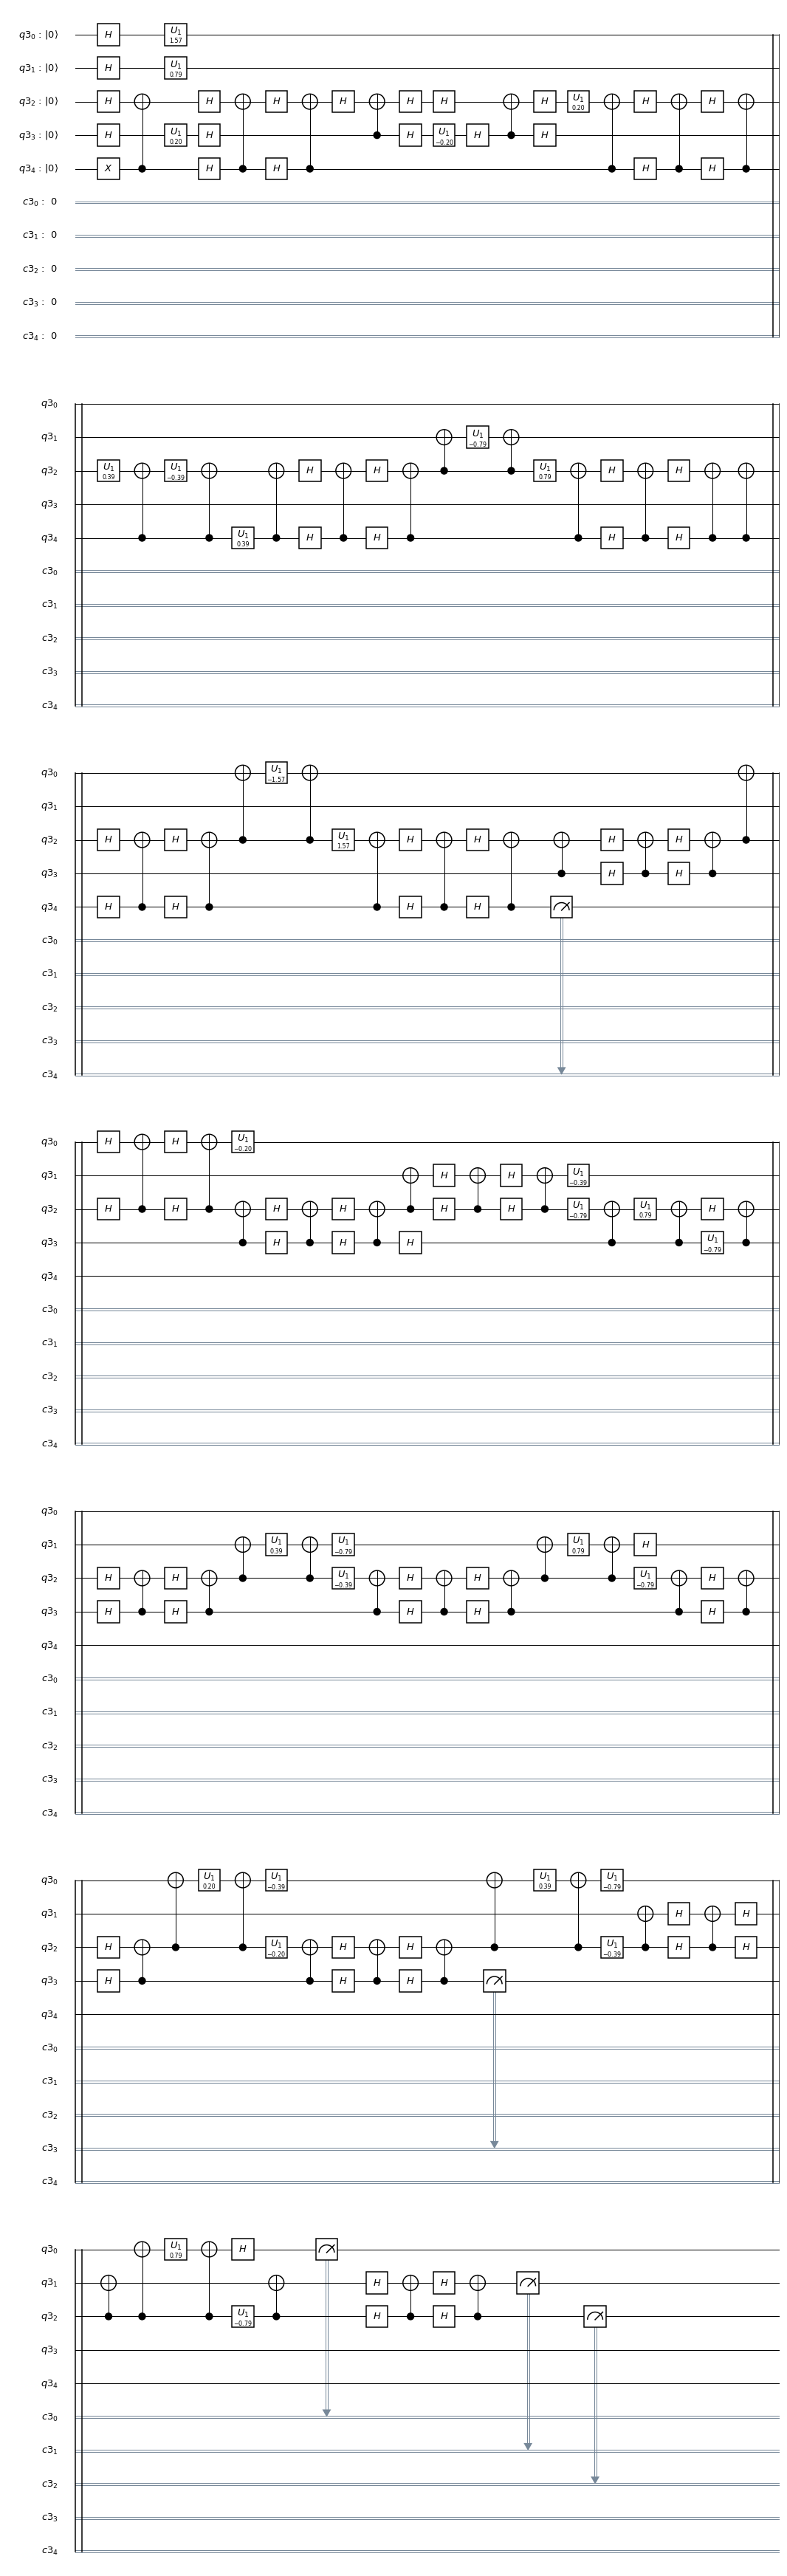

In [17]:
qc.draw(output='mpl')

In [18]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

/usr/local/lib/python3.5/dist-packages/qiskit/providers/ibmq/ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [11]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmqx2', backend_version='1.2.0', date=datetime.datetime(2019, 7, 18, 0, 20, 42, tzinfo=tzutc()), execution_id='d913ec3c-a8f1-11e9-9626-9c5c8e96e1ef', header=Obj(backend_name='ibmqx2', backend_version='1.0.0'), job_id='5d2fbacd9ce37e0072b76817', qobj_id='205a695d-a392-4b0d-ab5f-dc5c0b8d616b', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=101, 0x1=35, 0x10=37, 0x11=21, 0x12=25, 0x13=13, 0x14=28, 0x15=12, 0x16=32, 0x17=23, 0x18=19, 0x19=5, 0x1A=26, 0x1B=11, 0x1C=24, 0x1D=17, 0x1E=13, 0x1F=14, 0x2=50, 0x3=22, 0x4=80, 0x5=42, 0x6=48, 0x7=31, 0x8=64, 0x9=22, 0xA=37, 0xB=28, 0xC=50, 0xD=28, 0xE=40, 0xF=26)), header=Obj(clbit_labels=[['c2', 0], ['c2', 1], ['c2', 2], ['c2', 3], ['c2', 4]], creg_sizes=[['c2', 5]], memory_slots=5, n_qubits=5, name='circuit3', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, shots=1024, success=True)], status='Successful completion', success=True)


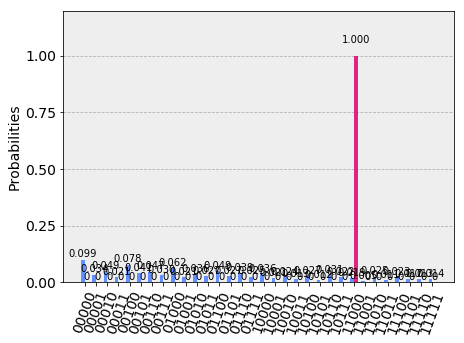

In [12]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

In [ ]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [58]:
api = IBMQuantumExperience(token)
api.get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

In [8]:
#api.get_last_codes()

In [ ]:
print(qc.qasm())